<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/data/Tensor_Management.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Kata: Tensor Management

## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## Part 1: Tensor Basics

In [1]:
# Import NumPy
import numpy as np

### Question

Create a 2D tensor (a matrix) with dimensions (3,4) containing integer values of your choice. Store this tensor in a variable named `x`.

In [2]:
# YOUR CODE HERE
x = np.random.random_integers(1,10,size=(3,4))
print(x)

[[ 4  3 10  6]
 [ 1  6  5  1]
 [ 8  4  4  9]]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  


In [3]:
print(x)
# Assert dimensions
assert x.ndim == 2
assert x.shape == (3, 4)
# Assert data type 
assert issubclass(x.dtype.type, np.integer)

[[ 4  3 10  6]
 [ 1  6  5  1]
 [ 8  4  4  9]]


### Question

Update the shape of the previous tensor so that it has dimensions (6,2).

In [4]:
# YOUR CODE HERE
x = x.reshape(6,2)

In [5]:
print(x)
# Assert tensor dimensions
assert x.ndim == 2
assert x.shape == (6, 2)

[[ 4  3]
 [10  6]
 [ 1  6]
 [ 5  1]
 [ 8  4]
 [ 4  9]]


### Question

Change the type of the previous tensor values to `float32`.

In [6]:
# YOUR CODE HERE
x = x.astype('float32')

In [7]:
print(x)
# Assert data type
assert issubclass(x.dtype.type, np.floating)

[[ 4.  3.]
 [10.  6.]
 [ 1.  6.]
 [ 5.  1.]
 [ 8.  4.]
 [ 4.  9.]]


### Question

Normalize the previous tensor so that it has a mean of 0 and a standard deviation of 1 on its first axis.

In [8]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)


In [9]:
print(x)
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
# Assert mean
assert np.abs(np.max(x_mean)) < 10**-6
# Assert standard deviation
assert np.abs(np.max(x_std-1)) < 10**-6

[[-0.45584232 -0.720634  ]
 [ 1.595448    0.45858523]
 [-1.4814875   0.45858523]
 [-0.11396058 -1.5067801 ]
 [ 0.91168463 -0.3275609 ]
 [-0.45584232  1.6378044 ]]


## Part 2: One-hot Encoding

In [10]:
from keras.utils import to_categorical

# Definition of a 1D tensor (vector)
tensor = np.array([3, 1, 0, 2, 1])

### Question

Encode the previous tensor into the `x` variable, following a binary representation (`one-hot encoding`).

In [11]:
# YOUR CODE HERE
t = to_categorical(tensor)
print(t)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [12]:
print(x)
# Assert one-hot encoding
assert x.shape == (5, 4)
assert np.array_equal([0,0,0,1], x[0])
assert np.array_equal([0,1,0,0], x[1])
assert np.array_equal([1,0,0,0], x[2])
assert np.array_equal([0,0,1,0], x[3])
assert np.array_equal([0,1,0,0], x[4])

[[-0.45584232 -0.720634  ]
 [ 1.595448    0.45858523]
 [-1.4814875   0.45858523]
 [-0.11396058 -1.5067801 ]
 [ 0.91168463 -0.3275609 ]
 [-0.45584232  1.6378044 ]]


AssertionError: 

## Part 3: Image Management

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
import PIL
# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

First image: (427, 640, 3)


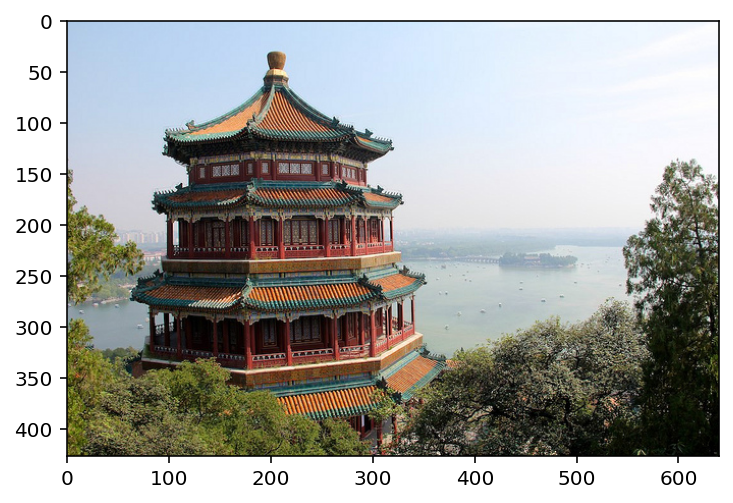

In [14]:
# Load samples images
images = np.asarray(load_sample_images().images)
#print(f'Number of images: {len(images)}. Images tensor: {images.shape}')

first_image = images[0]
# Display first image
plt.imshow(first_image)

# Print details about first image
print('First image:', first_image.shape)

### Question

Store in variables respectively named `rgb_values_topleft` and `rgb_values_bottomright` the RGB values of the top-left and bottom-right pixels of the first image.

In [23]:
# YOUR CODE HERE
first_image
rgb_values_topleft = first_image[0,0,:] 
rgb_values_bottomright = first_image[-1,-1,:] 

In [24]:
print(f'Top-left pixel: {rgb_values_topleft}')
assert rgb_values_topleft.shape == (3,)
print(f'Bottom-right pixel: {rgb_values_bottomright}')
assert rgb_values_bottomright.shape == (3,)

Top-left pixel: [174 201 231]
Bottom-right pixel: [15 24  7]


### Question

Reshape the previous `images` tensor into a 2D tensor.

In [40]:
# YOUR CODE HERE
images.reshape(2, 819840)

array([[174, 201, 231, ...,  15,  24,   7],
       [  2,  19,  13, ...,   9,  43,  27]], dtype=uint8)

In [41]:
# Assert new tensor dimensions
assert images.shape == (2, 819840)
# Assert RGB values of top-left in first image
assert np.array_equal(rgb_values_topleft, images[0,:3])
# Assert RGB values of bottom-right pixel in first image
assert np.array_equal(rgb_values_bottomright, images[0,819837:])

AssertionError: 